In [ ]:
!cd "./drive/MyDrive/mlproject/"


In [ ]:
!pip install -q kaggle

In [ ]:
!pip install -q kaggle
!pip install iterative_stratification -q
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.2 MB/s 


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"earthoer","key":"27126ba387179e2d61db97ba01327a52"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
!cp ./kaggle.json ~/.kaggle

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


# start


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
# %cd "./drive/MyDrive/mlproject/"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install iterative_stratification -q
!pip install tensorflow-addons
%cd "./drive/MyDrive/mlproject/"
from tensorflow.keras import Sequential                                          
from tensorflow.keras.layers import Dense, Activation,Flatten
from sklearn.model_selection import KFold
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from os import walk
from tensorflow.keras.layers import Dense, Flatten,Conv2D, MaxPooling2D, Activation,AveragePooling2D,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD,Adam
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet50V2,ResNet101V2,EfficientNetB0,EfficientNetB7,MobileNetV2,VGG16,MobileNetV2,VGG19,EfficientNetB3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, ReduceLROnPlateau
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from keras.models import Model
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from keras_preprocessing import image
from keras.layers import BatchNormalization
from keras.layers import Dropout
from IPython.display import clear_output 
from keras import layers,Sequential
import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.backend import clear_session
import tqdm.notebook as tq
from tqdm import tqdm
import os
import logging
import warnings
import tensorflow_addons as tfa
from tensorflow_addons.metrics import FBetaScore 
warnings.filterwarnings('ignore')
logging.getLogger("tensorflow").setLevel(logging.ERROR)
import keras.applications
label = ["cloudy","partly_cloudy","clear","haze","primary","water","habitation","agriculture","road","cultivation","bare_ground","slash_burn","selective_logging","blooming","conventional_mine","artisinal_mine","blow_down"]
rawtrain = pd.read_csv("./train_2.csv",header=None)
path = "./train-jpg/"
pathimg = "./train-jpg/train_"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/content/drive/.shortcut-targets-by-id/14eBjEcEj_EnANUvNakfdKHEjy_FU_p2n/mlproject


In [ ]:
size = 128
inputshape= (size,size,3)
batchsize = 128
dropoutrate = 0.5
epoch = 5
lr = 1e-4
nfolds =5
THRES = [0.2] * 17 # Threshold for truth value of label, applied on sigmoid output.
# path


ไม่ต้องรันช่องด้านล่าง ลบส่วนก่อนหน้าไปแล้ว


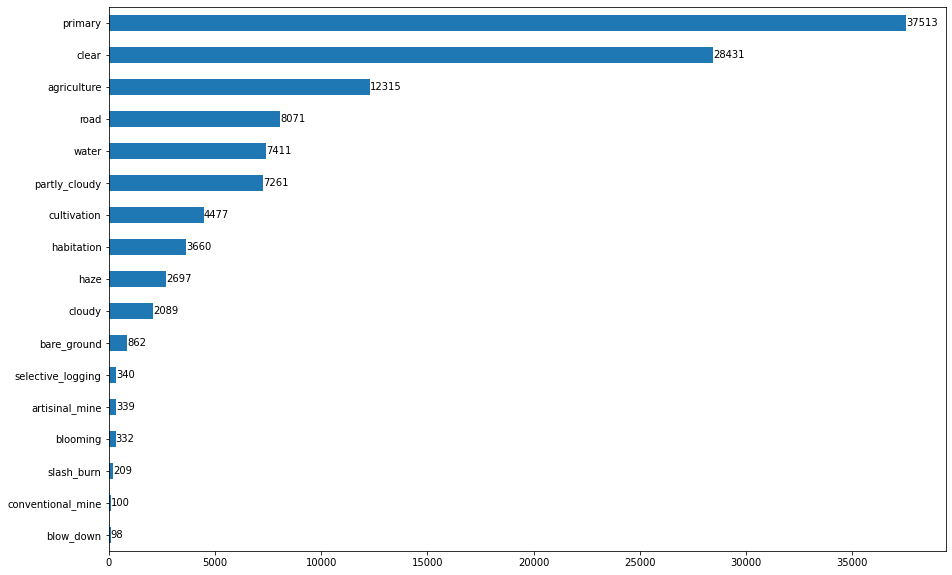

In [ ]:
label_count.plot(kind='barh',figsize =(15,10))
for i in range(label_count.shape[0]):
  plt.text(label_count.iloc[i] + 4,i,label_count.iloc[i],va='center')

In [ ]:
train_pic  = "./data/train-jpg"
train_csv = pd.read_csv("./data/train_v2.csv")

test_pic = "./test/test-jpg"
test_csv = pd.read_csv("./test/sample_submission.csv")

train_csv['image_name'] = train_csv['image_name'].astype(str) + '.jpg'
test_csv['image_name'] = test_csv['image_name'].astype(str)+ '.jpg'

test_csv['tags'] = test_csv['tags'].apply(lambda x : x.split(' '))
test_csv.head()
X_train_files = np.array(train_csv['image_name'].tolist())
y_train = np.array(train_csv['tags'].tolist())



In [ ]:
train_csv.shape


(40479, 2)

In [ ]:
label = []
for tag in train_csv['tags'].values:
  temp = tag.split(' ')
  for i in temp:
    if i not in label:
      label.append(i)
label.sort()
label

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [ ]:
l = np.array(label)
l.shape



(17,)

In [ ]:
def create_model():
    model = Sequential()
    model.add(InputLayer(inputshape))
    model.add(VGG16(weights='imagenet', include_top=False))
    # model.add(BatchNormalization())
    model.add(Flatten())   
    model.add(Dense(17, activation='sigmoid'))
    return model

clear_session()

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 17)                139281    
                                                                 
Total params: 14,853,969
Trainable params: 14,853,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32")
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.math.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

Found 32383 validated image filenames belonging to 17 classes.
Found 8096 validated image filenames belonging to 17 classes.
Found 61191 validated image filenames belonging to 17 classes.
Epoch 1/5
253/253 [==============================] - 247s 973ms/step - loss: 0.1499 - f2_score: 0.8112 - val_loss: 0.1160 - val_f2_score: 0.8669 - lr: 1.0000e-04
Epoch 2/5
253/253 [==============================] - 247s 976ms/step - loss: 0.1149 - f2_score: 0.8628 - val_loss: 0.1079 - val_f2_score: 0.8753 - lr: 1.0000e-04
Epoch 3/5
253/253 [==============================] - 247s 975ms/step - loss: 0.1074 - f2_score: 0.8731 - val_loss: 0.1013 - val_f2_score: 0.8915 - lr: 1.0000e-04
Epoch 4/5
253/253 [==============================] - 246s 970ms/step - loss: 0.1048 - f2_score: 0.8773 - val_loss: 0.0976 - val_f2_score: 0.8942 - lr: 1.0000e-04
Epoch 5/5
253/253 [==============================] - 245s 966ms/step - loss: 0.1014 - f2_score: 0.8812 - val_loss: 0.0972 - val_f2_score: 0.8924 - lr: 1.0000e-04


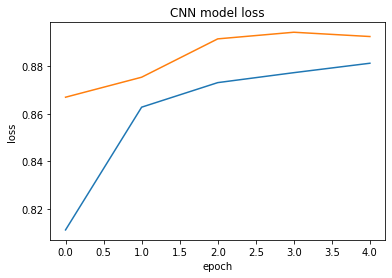

Found 32383 validated image filenames belonging to 17 classes.
Found 8096 validated image filenames belonging to 17 classes.
Found 61191 validated image filenames belonging to 17 classes.
Epoch 1/5
253/253 [==============================] - 245s 965ms/step - loss: 0.1583 - f2_score: 0.8012 - val_loss: 0.1244 - val_f2_score: 0.8675 - lr: 1.0000e-04
Epoch 2/5
253/253 [==============================] - 242s 954ms/step - loss: 0.1171 - f2_score: 0.8612 - val_loss: 0.1035 - val_f2_score: 0.8804 - lr: 1.0000e-04
Epoch 3/5
253/253 [==============================] - 240s 949ms/step - loss: 0.1093 - f2_score: 0.8716 - val_loss: 0.1040 - val_f2_score: 0.8908 - lr: 1.0000e-04
Epoch 4/5
253/253 [==============================] - 240s 948ms/step - loss: 0.1049 - f2_score: 0.8769 - val_loss: 0.0990 - val_f2_score: 0.8921 - lr: 1.0000e-04
Epoch 5/5
253/253 [==============================] - 239s 942ms/step - loss: 0.1017 - f2_score: 0.8806 - val_loss: 0.0953 - val_f2_score: 0.8886 - lr: 1.0000e-04


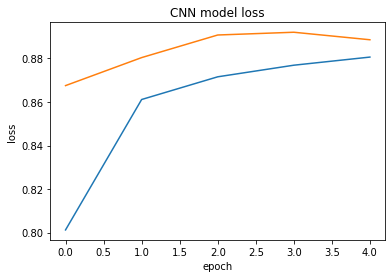

Found 32383 validated image filenames belonging to 17 classes.
Found 8096 validated image filenames belonging to 17 classes.
Found 61191 validated image filenames belonging to 17 classes.
Epoch 1/5
253/253 [==============================] - 239s 942ms/step - loss: 0.1606 - f2_score: 0.7926 - val_loss: 0.1207 - val_f2_score: 0.8700 - lr: 1.0000e-04
Epoch 2/5
253/253 [==============================] - 240s 949ms/step - loss: 0.1178 - f2_score: 0.8583 - val_loss: 0.1067 - val_f2_score: 0.8805 - lr: 1.0000e-04
Epoch 3/5
253/253 [==============================] - 239s 945ms/step - loss: 0.1097 - f2_score: 0.8706 - val_loss: 0.1018 - val_f2_score: 0.8831 - lr: 1.0000e-04
Epoch 4/5
253/253 [==============================] - 240s 950ms/step - loss: 0.1039 - f2_score: 0.8777 - val_loss: 0.0976 - val_f2_score: 0.8918 - lr: 1.0000e-04
Epoch 5/5
253/253 [==============================] - 241s 950ms/step - loss: 0.1018 - f2_score: 0.8812 - val_loss: 0.0976 - val_f2_score: 0.8937 - lr: 1.0000e-04


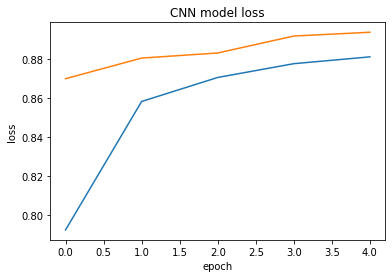

Found 32383 validated image filenames belonging to 17 classes.
Found 8096 validated image filenames belonging to 17 classes.
Found 61191 validated image filenames belonging to 17 classes.
Epoch 1/5
253/253 [==============================] - 241s 949ms/step - loss: 0.1605 - f2_score: 0.8002 - val_loss: 0.1186 - val_f2_score: 0.8577 - lr: 1.0000e-04
Epoch 2/5
253/253 [==============================] - 241s 954ms/step - loss: 0.1182 - f2_score: 0.8598 - val_loss: 0.1105 - val_f2_score: 0.8586 - lr: 1.0000e-04
Epoch 3/5
253/253 [==============================] - 244s 965ms/step - loss: 0.1099 - f2_score: 0.8696 - val_loss: 0.1018 - val_f2_score: 0.8936 - lr: 1.0000e-04
Epoch 4/5
253/253 [==============================] - 247s 975ms/step - loss: 0.1052 - f2_score: 0.8767 - val_loss: 0.0993 - val_f2_score: 0.8860 - lr: 1.0000e-04
Epoch 5/5
253/253 [==============================] - 244s 963ms/step - loss: 0.1024 - f2_score: 0.8801 - val_loss: 0.0990 - val_f2_score: 0.8933 - lr: 1.0000e-04


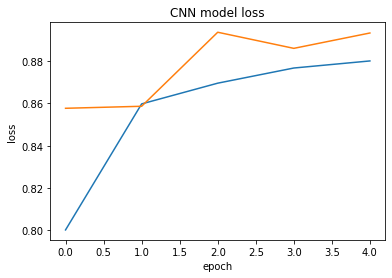

Found 32384 validated image filenames belonging to 17 classes.
Found 8095 validated image filenames belonging to 17 classes.
Found 61191 validated image filenames belonging to 17 classes.
Epoch 1/5
253/253 [==============================] - 249s 979ms/step - loss: 0.1525 - f2_score: 0.8092 - val_loss: 0.1123 - val_f2_score: 0.8648 - lr: 1.0000e-04
Epoch 2/5
253/253 [==============================] - 251s 990ms/step - loss: 0.1151 - f2_score: 0.8638 - val_loss: 0.1012 - val_f2_score: 0.8876 - lr: 1.0000e-04
Epoch 3/5
253/253 [==============================] - 247s 976ms/step - loss: 0.1086 - f2_score: 0.8716 - val_loss: 0.1046 - val_f2_score: 0.8817 - lr: 1.0000e-04
Epoch 4/5
253/253 [==============================] - 249s 983ms/step - loss: 0.1047 - f2_score: 0.8769 - val_loss: 0.1001 - val_f2_score: 0.8925 - lr: 1.0000e-04
Epoch 5/5
253/253 [==============================] - 240s 949ms/step - loss: 0.1016 - f2_score: 0.8817 - val_loss: 0.1009 - val_f2_score: 0.8856 - lr: 1.0000e-04


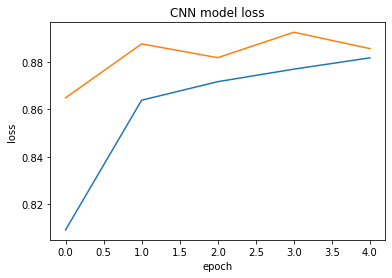

In [ ]:
num_fold = 0

y_test = []

folds = KFold(n_splits=nfolds, shuffle=True, random_state=1).split(X_train_files, y_train)

for train_index, val_index in folds:
    X_train_files_fold = X_train_files[train_index]
    y_train_fold = y_train[train_index]
    X_val_files_fold = X_train_files[val_index]
    y_val_fold = np.array(y_train[val_index])
    
    train_df = pd.DataFrame(list(zip(X_train_files_fold, y_train_fold)), columns = ['image_name', 'tags'])
    val_df = pd.DataFrame(list(zip(X_val_files_fold, y_val_fold)), columns = ['image_name', 'tags'])
    
    train_df['tags'] = train_df['tags'].apply(lambda x: x.split(' '))
    val_df['tags'] = val_df['tags'].apply(lambda x: x.split(' '))

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True
    )
    
    train_generator = train_datagen.flow_from_dataframe(
        train_df,
        directory=train_pic,
        x_col='image_name',
        y_col='tags',
        target_size=(inputshape[0], inputshape[1]),
        class_mode='categorical',
        batch_size=batchsize,
        classes=label,
    )
    
    val_datagen = ImageDataGenerator(
        rescale=1./255
    )
    
    val_generator = val_datagen.flow_from_dataframe(
        val_df,
        directory=train_pic,
        x_col='image_name',
        y_col='tags',
        target_size=(inputshape[0], inputshape[1]),
        class_mode='categorical',
        batch_size=batchsize,
        classes=label,
    )
    
    test_datagen = ImageDataGenerator(
        rescale=1./255
    )
    
    test_generator = test_datagen.flow_from_dataframe(
        test_csv,
        directory=test_pic,
        x_col='image_name',
        y_col='tags',
        target_size=(inputshape[0], inputshape[1]),
        class_mode='categorical',
        batch_size=batchsize,
        classes=label,
        shuffle=False,
    )

    model_path_of_fold = os.path.join('', 'weights_of_fold_' + str(num_fold) + '.h5')
    
    clear_session()
    model = create_model()
    
    adam = Adam(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[f2_score])

    callbacks = [
        ModelCheckpoint(model_path_of_fold, monitor='val_f2_score', save_best_only=True, mode='max'),
        ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, mode='min', min_lr=1e-5)
    ]
    
    history = model.fit_generator(train_generator, epochs=epoch, validation_data=val_generator, callbacks=callbacks)

    plt.plot(history.history['f2_score'])
    plt.plot(history.history['val_f2_score'])
    plt.title('CNN model loss')
    plt.ylabel('loss')

    plt.xlabel('epoch')
    plt.show()

    model.load_weights(model_path_of_fold)

    p_test = model.predict_generator(test_generator)

    y_test.append(p_test)

In [ ]:
result = np.array(y_test[0])
for i in range(1, nfolds):
    result += np.array(y_test[i])
result /= nfolds
result = pd.DataFrame(result, columns = label)
result.head()

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,0.006126,0.000064,0.000247,0.022758,0.000555,0.994566,0.000020,0.000007,0.005056,0.000925,0.000771,0.004002,0.999964,0.002624,0.002690,0.000078,0.005752
1,0.017602,0.000162,0.000555,0.030820,0.001671,0.975411,0.000011,0.000016,0.014536,0.001685,0.000297,0.028926,0.999979,0.003801,0.006008,0.000373,0.008347
2,0.080619,0.000919,0.003321,0.000378,0.000921,0.000022,0.002552,0.000456,0.026363,0.004123,0.000222,0.999119,0.996863,0.025695,0.000765,0.001595,0.112812
3,0.458780,0.000286,0.003086,0.005453,0.001992,0.794869,0.000015,0.000070,0.449941,0.006939,0.001681,0.275235,0.999972,0.020765,0.004789,0.001703,0.055860
4,0.075832,0.000897,0.002177,0.000175,0.000258,0.000448,0.228036,0.000181,0.017569,0.008184,0.002436,0.861451,0.786628,0.027510,0.000303,0.000467,0.073094


In [ ]:
resultb = result.apply(lambda x:x>THRES,axis =1)
for i in range(0,20):
  for j in label:
    if(resultb[j][i]==True):
      print(j," ",end='')
  print("")

    


clear  primary  
clear  primary  
partly_cloudy  primary  
agriculture  clear  cultivation  partly_cloudy  primary  
cloudy  partly_cloudy  primary  
clear  primary  
agriculture  clear  cultivation  habitation  primary  road  water  
agriculture  clear  habitation  primary  road  
clear  primary  
agriculture  clear  cultivation  haze  primary  
partly_cloudy  primary  water  
agriculture  clear  cultivation  primary  
cloudy  
agriculture  clear  cultivation  primary  
agriculture  clear  cultivation  primary  
clear  primary  
agriculture  clear  cultivation  habitation  primary  road  
partly_cloudy  primary  
clear  haze  primary  
clear  primary  road  water  


In [ ]:
model = keras.models.load_model('./my_model', custom_objects=None, compile=False, options=None)

In [ ]:
model.save("./my_model")

In [ ]:
preds = []
for i in range(result.shape[0]):
    a = result.loc[[i]]
    a = a.apply(lambda x: x > THRES, axis=1)
    a = a.transpose()
    a = a.loc[a[i] == True]
    ' '.join(list(a.index))
    preds.append(' '.join(list(a.index)))
    
test_csv['tags'] = preds
test_csv['image_name'] = test_csv['image_name'].astype(str).str.slice(stop=-4)
test_csv.to_csv('submit_new.csv', index=False)
